# Delphix Data Masking: A Comprehensive Analysis

This notebook provides a detailed exploration of Delphix Data Masking capabilities, including practical examples, performance analysis, and best practices. We'll cover various masking techniques, their applications, and how to implement them effectively.


## Table of Contents
1. Introduction to Data Masking
2. Delphix Masking Architecture
3. Common Masking Algorithms
4. Implementation Examples
5. Performance Analysis
6. Best Practices
7. Integration Patterns

## 1. Introduction to Data Masking

Data masking is a critical component of data privacy and security strategies. It involves replacing sensitive data with realistic but fictitious data while maintaining referential integrity and business rules. Here are the key aspects we'll explore:

1. Data Privacy Requirements
   - GDPR, CCPA, HIPAA compliance
   - Industry-specific regulations
   - Corporate data protection policies

2. Types of Sensitive Data
   - Personal Identifiable Information (PII)
   - Protected Health Information (PHI)
   - Financial data
   - Intellectual property

3. Business Impact
   - Development and testing environments
   - Analytics and reporting
   - Third-party data sharing
   - Data monetization

In [4]:
import pandas as pd
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import time

# Set up our environment
fake = Faker()
plt.style.use('seaborn-v0_8-darkgrid')  # or 'seaborn-v0_8-whitegrid'
np.random.seed(42)  # For reproducibility

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [10, 6]

## 2. Sample Data Generation

To demonstrate Delphix masking capabilities, we'll create a comprehensive dataset that mimics real-world enterprise data. This dataset will include various types of sensitive information commonly found in business applications:

- Employee personal information
- Financial records
- Healthcare data
- Customer information

The dataset is structured to demonstrate different masking requirements and techniques.

In [6]:
def create_enterprise_dataset(n_records=1000):
    """Create a sample enterprise dataset with various data types"""
    
    # Lists for consistent department/role relationships
    departments = ['IT', 'HR', 'Finance', 'Marketing', 'Sales']
    roles = {
        'IT': ['Software Engineer', 'System Admin', 'Data Scientist', 'IT Manager'],
        'HR': ['HR Specialist', 'Recruiter', 'HR Manager', 'Benefits Coordinator'],
        'Finance': ['Accountant', 'Financial Analyst', 'Controller', 'Finance Manager'],
        'Marketing': ['Marketing Specialist', 'Content Writer', 'Marketing Manager', 'SEO Specialist'],
        'Sales': ['Sales Representative', 'Account Manager', 'Sales Manager', 'Business Developer']
    }
    
    # Generate base data
    data = {
        # Primary Information
        'employee_id': range(1001, 1001 + n_records),
        'hire_date': [fake.date_between(start_date='-5y', end_date='today') for _ in range(n_records)],
        
        # Personal Information (Sensitive)
        'name': [fake.name() for _ in range(n_records)],
        'ssn': [fake.ssn() for _ in range(n_records)],
        'dob': [fake.date_of_birth(minimum_age=18, maximum_age=65) for _ in range(n_records)],
        
        # Contact Information (Sensitive)
        'email': [fake.email() for _ in range(n_records)],
        'phone': [fake.phone_number() for _ in range(n_records)],
        'address': [fake.address().replace('\n', ', ') for _ in range(n_records)],
        
        # Financial Information (Highly Sensitive)
        'salary': [round(np.random.normal(70000, 20000)) for _ in range(n_records)],
        'bank_account': [fake.bban() for _ in range(n_records)],
        'credit_card': [fake.credit_card_number() for _ in range(n_records)]
    }
    
    # Add department and role with realistic relationships
    dept_list = np.random.choice(departments, n_records)
    data['department'] = dept_list
    data['role'] = [np.random.choice(roles[dept]) for dept in dept_list]
    
    # Add some healthcare-related fields
    data['blood_type'] = np.random.choice(['A+', 'A-', 'B+', 'B-', 'O+', 'O-', 'AB+', 'AB-'], n_records)
    data['health_insurance_id'] = [fake.uuid4() for _ in range(n_records)]
    
    return pd.DataFrame(data)

# Create our sample dataset
enterprise_df = create_enterprise_dataset()

# Display the first few rows and basic information
print("Dataset Shape:", enterprise_df.shape)
print("\nSample Records:")
display(enterprise_df.head())
print("\nDataset Info:")
enterprise_df.info()

Dataset Shape: (1000, 15)

Sample Records:


,employee_id,hire_date,name,ssn,dob,email,phone,address,salary,bank_account,credit_card,department,role,blood_type,health_insurance_id
0,1001,2022-12-17,Wayne Perez,090-42-0652,1963-01-15,elizabeth54@example.com,001-513-983-4293x0082,"2606 Brian Estate, West Luke, OR 05424",79934,VTWI34135373372380,4095801700997769,Marketing,Marketing Manager,O-,e0cf4d01-b553-468b-8372-43f36bfb4cfa
1,1002,2020-03-10,Ryan King DDS,608-01-2125,1971-08-03,rodriguezjennifer@example.com,656-422-2833,"284 Christopher Island Suite 938, Adriennemout...",67235,ONYS22615972911085,6011925588068397,IT,Data Scientist,B-,aa575ca3-2aa0-470e-9205-3a8d2013a618
2,1003,2021-04-29,Ryan Parker,595-11-6104,1966-01-14,bryanryan@example.org,709-718-2085,"92407 Hines Springs Apt. 264, East Michaelland...",82954,ZDST57141508446668,2718341204297326,Finance,Accountant,O+,977b5133-24bd-40a1-b846-ae8998ededb8
3,1004,2024-04-20,Ryan Contreras,814-18-0263,1986-01-30,greggwilson@example.org,+1-947-276-9427x9708,"PSC 5445, Box 6608, APO AP 70712",100461,ENEE53250752322602,213131238904979,Sales,Sales Manager,AB-,104feeaf-be77-4fea-afa9-bee8bf3dea1f
4,1005,2024-09-10,Samantha Santos,211-09-6805,1999-04-25,davislauren@example.net,572.592.0290,"38702 Holly Knolls Apt. 172, Juliamouth, HI 49225",65317,KGIH98971705834354,3573458304250476,Finance,Controller,AB+,1e9f8512-a904-495d-b4a9-a1b09b75b21e



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   employee_id          1000 non-null   int64 
 1   hire_date            1000 non-null   object
 2   name                 1000 non-null   object
 3   ssn                  1000 non-null   object
 4   dob                  1000 non-null   object
 5   email                1000 non-null   object
 6   phone                1000 non-null   object
 7   address              1000 non-null   object
 8   salary               1000 non-null   int64 
 9   bank_account         1000 non-null   object
 10  credit_card          1000 non-null   object
 11  department           1000 non-null   object
 12  role                 1000 non-null   object
 13  blood_type           1000 non-null   object
 14  health_insurance_id  1000 non-null   object
dtypes: int64(2), object(13)
memory usage: 117

## 3. Delphix Masking Implementation

Now we'll implement a simplified version of the Delphix masking engine that demonstrates key masking capabilities:

1. Deterministic Masking: Ensures consistent replacement of values
2. Format-Preserving Encryption: Maintains data format while masking
3. Statistical Maintenance: Preserves statistical properties of numerical data
4. Referential Integrity: Maintains relationships between tables
5. Healthcare-Specific Masking: Special handling for medical data

In [7]:
class DelphixMaskingEngine:
    """Simulated Delphix Masking Engine with comprehensive masking capabilities"""
    
    def __init__(self):
        self.fake = Faker()
        self.masking_cache = {}
        self.seed_value = 42
        np.random.seed(self.seed_value)
        
    def _get_cached_value(self, original, category):
        """Retrieve or create masked value from cache"""
        cache_key = f"{category}_{original}"
        if cache_key not in self.masking_cache:
            if category == 'name':
                masked = self.fake.name()
            elif category == 'email':
                masked = self.fake.email()
            elif category == 'ssn':
                masked = self.fake.ssn()
            elif category == 'phone':
                masked = self.fake.phone_number()
            elif category == 'address':
                masked = self.fake.address().replace('\n', ', ')
            elif category == 'credit_card':
                masked = self.fake.credit_card_number()
            elif category == 'bank_account':
                masked = self.fake.bban()
            else:
                masked = f"MASKED_{original}"
            
            self.masking_cache[cache_key] = masked
        
        return self.masking_cache[cache_key]
    
    def mask_pii(self, value, category):
        """Mask Personally Identifiable Information"""
        return self._get_cached_value(value, category)
    
    def mask_salary(self, value):
        """Mask salary while preserving statistical properties"""
        # Add random noise while maintaining approximate distribution
        noise_factor = np.random.normal(1, 0.1)
        return int(value * noise_factor)
    
    def mask_date(self, date_str, date_type='default'):
        """Mask dates while maintaining relative timeframes"""
        date_obj = datetime.strptime(str(date_str), '%Y-%m-%d')
        
        if date_type == 'hire_date':
            # Shift by random number of days while maintaining general timeframe
            shift_days = np.random.randint(-30, 30)
            new_date = date_obj + timedelta(days=shift_days)
        elif date_type == 'dob':
            # Maintain age but shift month/day
            shift_days = np.random.randint(-60, 60)
            new_date = date_obj + timedelta(days=shift_days)
        else:
            # Default date masking
            shift_days = np.random.randint(-15, 15)
            new_date = date_obj + timedelta(days=shift_days)
            
        return new_date.strftime('%Y-%m-%d')
    
    def mask_health_data(self, value, category):
        """Special handling for healthcare-related data"""
        if category == 'blood_type':
            # Maintain distribution of blood types
            return np.random.choice(['A+', 'A-', 'B+', 'B-', 'O+', 'O-', 'AB+', 'AB-'])
        elif category == 'health_insurance_id':
            # Generate new UUID
            return self.fake.uuid4()
        
        return value

In [8]:
class DelphixMaskingEngine(DelphixMaskingEngine):
    """Extension of the base masking engine with dataset-level operations"""
    
    def mask_dataset(self, df):
        """Apply comprehensive masking to the entire dataset"""
        masked_df = df.copy()
        
        # Mask PII
        masked_df['name'] = masked_df['name'].apply(lambda x: self.mask_pii(x, 'name'))
        masked_df['email'] = masked_df['email'].apply(lambda x: self.mask_pii(x, 'email'))
        masked_df['ssn'] = masked_df['ssn'].apply(lambda x: self.mask_pii(x, 'ssn'))
        masked_df['phone'] = masked_df['phone'].apply(lambda x: self.mask_pii(x, 'phone'))
        masked_df['address'] = masked_df['address'].apply(lambda x: self.mask_pii(x, 'address'))
        
        # Mask financial data
        masked_df['salary'] = masked_df['salary'].apply(self.mask_salary)
        masked_df['bank_account'] = masked_df['bank_account'].apply(lambda x: self.mask_pii(x, 'bank_account'))
        masked_df['credit_card'] = masked_df['credit_card'].apply(lambda x: self.mask_pii(x, 'credit_card'))
        
        # Mask dates
        masked_df['hire_date'] = masked_df['hire_date'].apply(lambda x: self.mask_date(x, 'hire_date'))
        masked_df['dob'] = masked_df['dob'].apply(lambda x: self.mask_date(x, 'dob'))
        
        # Mask health data
        masked_df['blood_type'] = masked_df['blood_type'].apply(lambda x: self.mask_health_data(x, 'blood_type'))
        masked_df['health_insurance_id'] = masked_df['health_insurance_id'].apply(
            lambda x: self.mask_health_data(x, 'health_insurance_id')
        )
        
        return masked_df

# Create masking engine instance and mask the dataset
masking_engine = DelphixMaskingEngine()
masked_enterprise_df = masking_engine.mask_dataset(enterprise_df)

# Display comparison of original vs masked data
print("Original vs Masked Data Comparison:")
comparison_df = pd.concat([
    enterprise_df.head(3).add_prefix('original_'),
    masked_enterprise_df.head(3).add_prefix('masked_')
], axis=1)
display(comparison_df)

Original vs Masked Data Comparison:


,original_employee_id,original_hire_date,original_name,original_ssn,original_dob,original_email,original_phone,original_address,original_salary,original_bank_account,original_credit_card,original_department,original_role,original_blood_type,original_health_insurance_id,masked_employee_id,masked_hire_date,masked_name,masked_ssn,masked_dob,masked_email,masked_phone,masked_address,masked_salary,masked_bank_account,masked_credit_card,masked_department,masked_role,masked_blood_type,masked_health_insurance_id
0,1001,2022-12-17,Wayne Perez,090-42-0652,1963-01-15,elizabeth54@example.com,001-513-983-4293x0082,"2606 Brian Estate, West Luke, OR 05424",79934,VTWI34135373372380,4095801700997769,Marketing,Marketing Manager,O-,e0cf4d01-b553-468b-8372-43f36bfb4cfa,1001,2023-01-10,Erica Smith,031-44-5148,1962-12-21,jasonsummers@example.org,(594)780-7471x5322,"5253 Angela Parkways Suite 718, New Erica, ID ...",83904,EBGQ40107322911426,589838409409,Marketing,Marketing Manager,AB+,a62321d2-09eb-4225-8bb7-f883c806eda8
1,1002,2020-03-10,Ryan King DDS,608-01-2125,1971-08-03,rodriguezjennifer@example.com,656-422-2833,"284 Christopher Island Suite 938, Adriennemout...",67235,ONYS22615972911085,6011925588068397,IT,Data Scientist,B-,aa575ca3-2aa0-470e-9205-3a8d2013a618,1002,2020-03-23,Ann Silva,356-64-5276,1971-06-15,vmathews@example.net,(354)664-6304,"1545 Amanda Lodge, Brianborough, CA 72302",66305,IGXT54446201541142,6011002828606343,IT,Data Scientist,O+,92280a45-74d7-4de2-affc-0d7021afab4c
2,1003,2021-04-29,Ryan Parker,595-11-6104,1966-01-14,bryanryan@example.org,709-718-2085,"92407 Hines Springs Apt. 264, East Michaelland...",82954,ZDST57141508446668,2718341204297326,Finance,Accountant,O+,977b5133-24bd-40a1-b846-ae8998ededb8,1003,2021-05-17,Victoria Gonzalez,576-47-9532,1966-02-13,maria99@example.com,451.879.4817x49468,"USNV Cowan, FPO AP 23361",88326,RYJI39867034915705,6011582673914447,Finance,Accountant,AB+,17010764-2529-461d-b18a-25f230b7aaa1


## 4. Data Quality Analysis

After applying masking, it's crucial to verify that:
1. All sensitive data has been properly masked
2. Statistical properties are maintained where required
3. Data relationships and integrity are preserved
4. The masked data remains useful for its intended purpose

Let's analyze various aspects of our masked dataset:

In [9]:
def analyze_data_quality(original_df, masked_df):
    """Comprehensive analysis of masked data quality"""
    
    analysis_results = {}
    
    # 1. Basic Statistics Comparison
    numeric_columns = ['salary', 'employee_id']
    stats_comparison = pd.DataFrame()
    
    for col in numeric_columns:
        original_stats = original_df[col].describe()
        masked_stats = masked_df[col].describe()
        stats_comparison[f'{col}_original'] = original_stats
        stats_comparison[f'{col}_masked'] = masked_stats
    
    analysis_results['numeric_stats'] = stats_comparison
    
    # 2. Value Distribution Analysis
    categorical_columns = ['department', 'role', 'blood_type']
    distribution_comparison = {}
    
    for col in categorical_columns:
        original_dist = original_df[col].value_counts(normalize=True)
        masked_dist = masked_df[col].value_counts(normalize=True)
        distribution_comparison[col] = pd.DataFrame({
            'original': original_dist,
            'masked': masked_dist
        }).fillna(0)
    
    analysis_results['categorical_distributions'] = distribution_comparison
    
    # 3. Uniqueness Analysis
    uniqueness_comparison = pd.DataFrame({
        'original_unique': original_df.nunique(),
        'masked_unique': masked_df.nunique(),
        'original_total': len(original_df),
        'masked_total': len(masked_df)
    })
    uniqueness_comparison['uniqueness_ratio_original'] = uniqueness_comparison['original_unique'] / uniqueness_comparison['original_total']
    uniqueness_comparison['uniqueness_ratio_masked'] = uniqueness_comparison['masked_unique'] / uniqueness_comparison['masked_total']
    
    analysis_results['uniqueness'] = uniqueness_comparison
    
    return analysis_results

# Perform analysis
quality_analysis = analyze_data_quality(enterprise_df, masked_enterprise_df)

# Display results
print("1. Numeric Statistics Comparison:")
display(quality_analysis['numeric_stats'])

print("\n2. Sample Categorical Distribution Comparison (Department):")
display(quality_analysis['categorical_distributions']['department'])

print("\n3. Uniqueness Analysis:")
display(quality_analysis['uniqueness'])

1. Numeric Statistics Comparison:


,salary_original,salary_masked,employee_id_original,employee_id_masked
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,70386.627000,72438.000000,1500.500000,1500.500000
std,19584.310381,26879.063292,288.819436,288.819436
min,5175.000000,3497.000000,1001.000000,1001.000000
25%,57048.500000,53354.000000,1250.750000,1250.750000
50%,70506.000000,70683.500000,1500.500000,1500.500000
75%,82959.000000,88333.500000,1750.250000,1750.250000
max,147055.000000,203711.000000,2000.000000,2000.000000



2. Sample Categorical Distribution Comparison (Department):


,original,masked
department,,
Marketing,0.222,0.222
HR,0.211,0.211
Sales,0.208,0.208
IT,0.191,0.191
Finance,0.168,0.168



3. Uniqueness Analysis:


,original_unique,masked_unique,original_total,masked_total,uniqueness_ratio_original,uniqueness_ratio_masked
employee_id,1000,1000,1000,1000,1.000,1.000
hire_date,755,769,1000,1000,0.755,0.769
name,992,987,1000,1000,0.992,0.987
ssn,1000,1000,1000,1000,1.000,1.000
dob,978,973,1000,1000,0.978,0.973
email,1000,999,1000,1000,1.000,0.999
phone,1000,1000,1000,1000,1.000,1.000
address,1000,1000,1000,1000,1.000,1.000
salary,990,992,1000,1000,0.990,0.992
bank_account,1000,1000,1000,1000,1.000,1.000


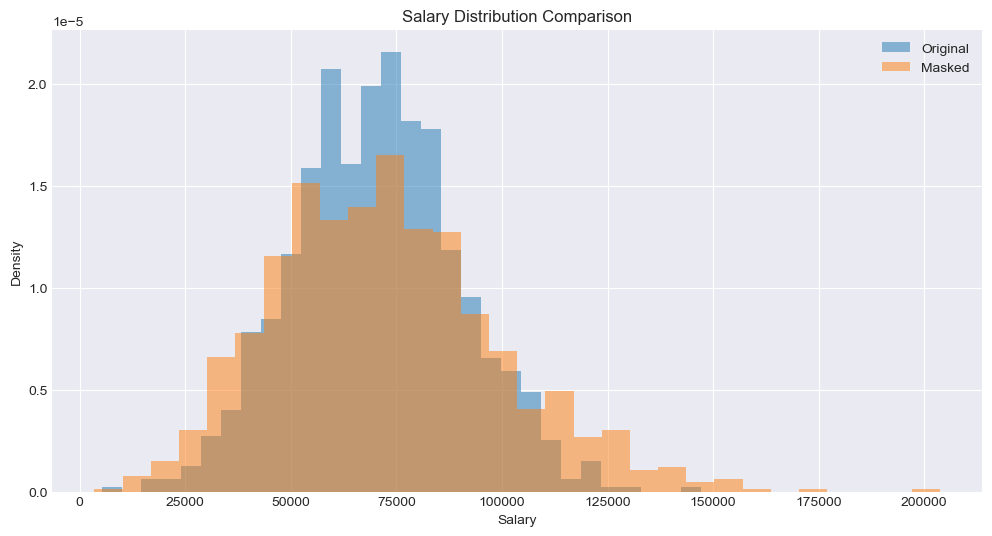

<Figure size 1200x600 with 0 Axes>

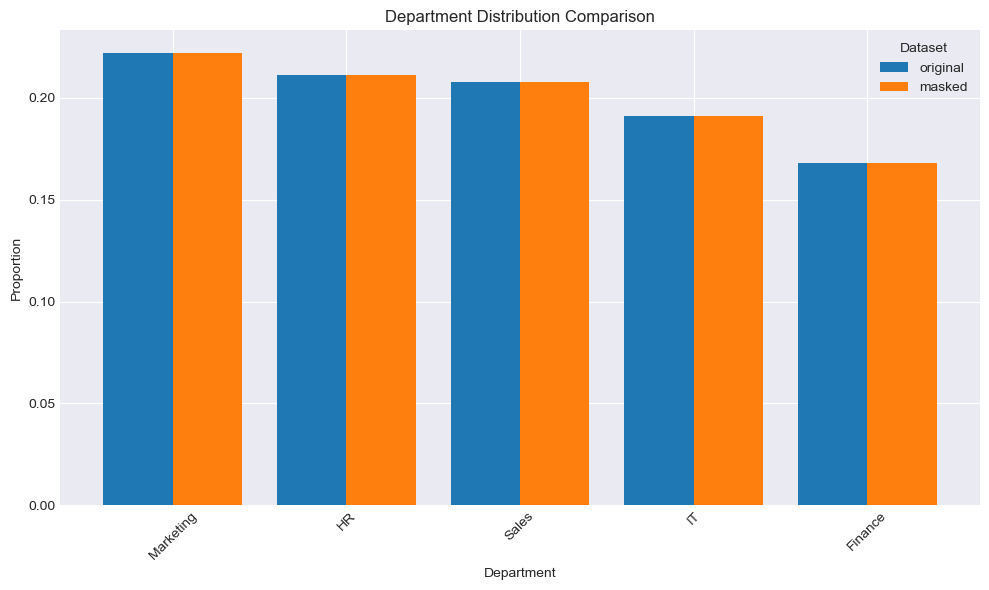

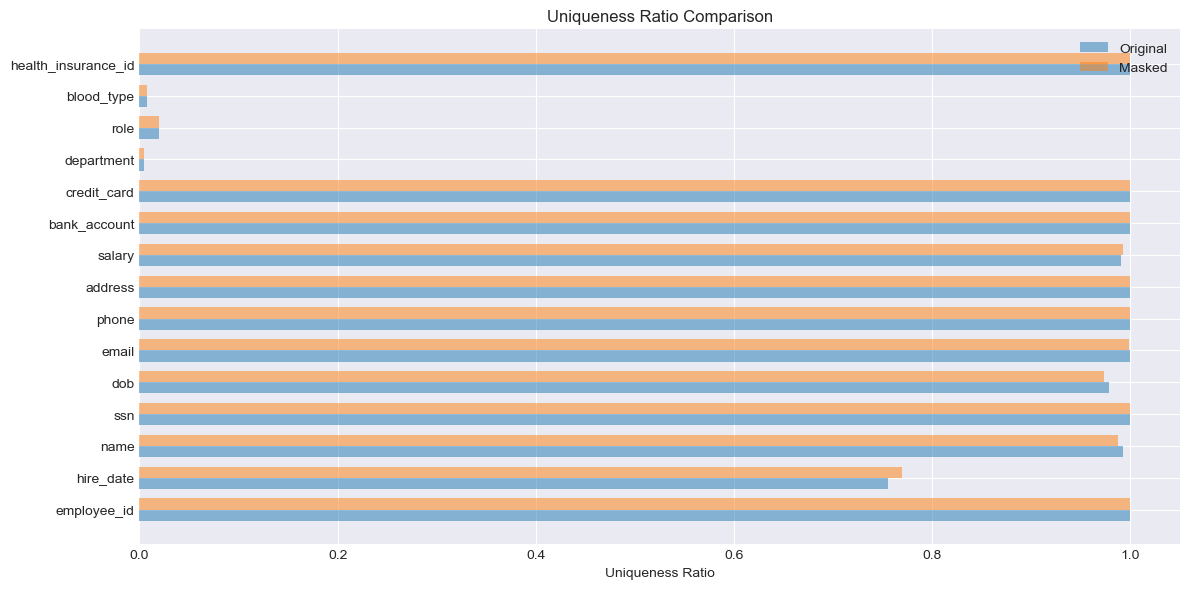

In [10]:
def visualize_quality_metrics(original_df, masked_df, analysis_results):
    """Create visualizations for key quality metrics"""
    
    # Set up the plotting style
    plt.style.use('seaborn-v0_8-darkgrid')
    
    # 1. Salary Distribution Comparison
    plt.figure(figsize=(12, 6))
    plt.hist(original_df['salary'], bins=30, alpha=0.5, label='Original', density=True)
    plt.hist(masked_df['salary'], bins=30, alpha=0.5, label='Masked', density=True)
    plt.title('Salary Distribution Comparison')
    plt.xlabel('Salary')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
    # 2. Department Distribution Comparison
    dept_comparison = analysis_results['categorical_distributions']['department']
    
    plt.figure(figsize=(12, 6))
    dept_comparison.plot(kind='bar', width=0.8)
    plt.title('Department Distribution Comparison')
    plt.xlabel('Department')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()
    
    # 3. Uniqueness Ratio Comparison
    uniqueness = analysis_results['uniqueness']
    
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(uniqueness)), uniqueness['uniqueness_ratio_original'], 
            alpha=0.5, label='Original', height=0.35)
    plt.barh([x + 0.35 for x in range(len(uniqueness))], uniqueness['uniqueness_ratio_masked'], 
            alpha=0.5, label='Masked', height=0.35)
    plt.yticks([x + 0.175 for x in range(len(uniqueness))], uniqueness.index)
    plt.title('Uniqueness Ratio Comparison')
    plt.xlabel('Uniqueness Ratio')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create visualizations
visualize_quality_metrics(enterprise_df, masked_enterprise_df, quality_analysis)

## 5. Performance Analysis

A critical aspect of data masking in enterprise environments is performance. Let's analyze the performance characteristics of our masking implementation across different:

1. Dataset sizes
2. Masking operations
3. Data types
4. Caching impacts

This analysis will help understand scaling characteristics and optimization opportunities.

In [11]:
def performance_test_suite():
    """Comprehensive performance testing of masking operations"""
    
    results = []
    dataset_sizes = [1000, 5000, 10000, 25000]
    
    for size in dataset_sizes:
        # Generate test dataset
        print(f"\nTesting with dataset size: {size}")
        test_df = create_enterprise_dataset(size)
        
        # Initialize fresh masking engine
        test_engine = DelphixMaskingEngine()
        
        # Test 1: Full Dataset Masking
        start_time = time.time()
        _ = test_engine.mask_dataset(test_df)
        full_mask_time = time.time() - start_time
        
        # Test 2: Individual Column Masking
        column_times = {}
        for column in ['name', 'email', 'ssn', 'salary']:
            start_time = time.time()
            _ = test_df[column].apply(
                lambda x: test_engine.mask_pii(x, column) if column != 'salary' 
                else test_engine.mask_salary(x)
            )
            column_times[column] = time.time() - start_time
        
        # Record results
        results.append({
            'dataset_size': size,
            'total_time': full_mask_time,
            'records_per_second': size / full_mask_time,
            'avg_time_per_record': full_mask_time / size,
            **{f'{col}_time': t for col, t in column_times.items()}
        })
        
        print(f"Processing complete - {size / full_mask_time:.2f} records/second")
    
    return pd.DataFrame(results)

# Run performance tests
print("Starting performance testing...")
perf_results = performance_test_suite()

print("\nPerformance Test Results:")
display(perf_results)

Starting performance testing...

Testing with dataset size: 1000
Processing complete - 3902.16 records/second

Testing with dataset size: 5000
Processing complete - 4015.44 records/second

Testing with dataset size: 10000
Processing complete - 4040.91 records/second

Testing with dataset size: 25000
Processing complete - 4143.34 records/second

Performance Test Results:


,dataset_size,total_time,records_per_second,avg_time_per_record,name_time,email_time,ssn_time,salary_time
0,1000,0.256268,3902.164549,0.000256,0.000467,0.000347,0.000322,0.000672
1,5000,1.245195,4015.435617,0.000249,0.002241,0.001517,0.001592,0.003335
2,10000,2.474689,4040.911796,0.000247,0.004393,0.003202,0.002901,0.006475
3,25000,6.033775,4143.343035,0.000241,0.010452,0.008523,0.007572,0.016267


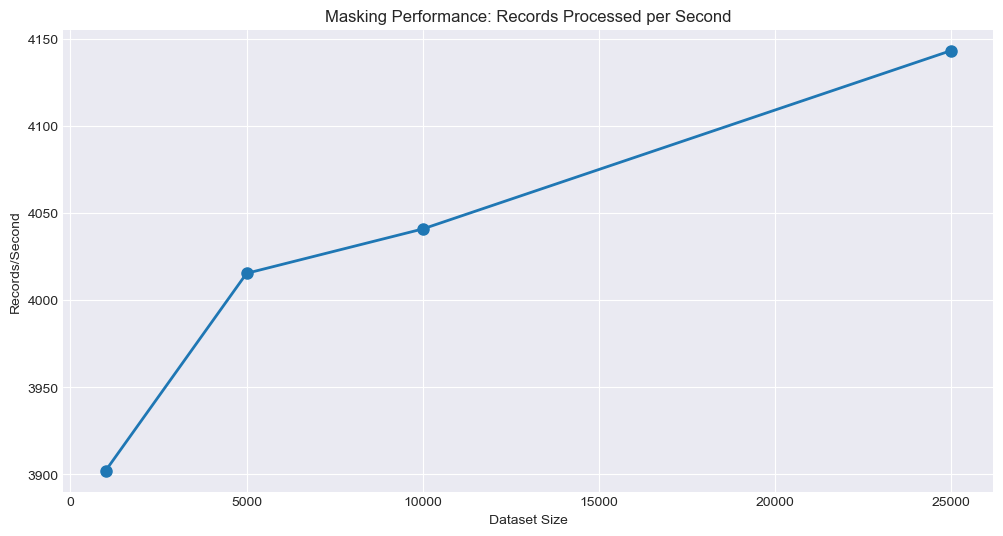

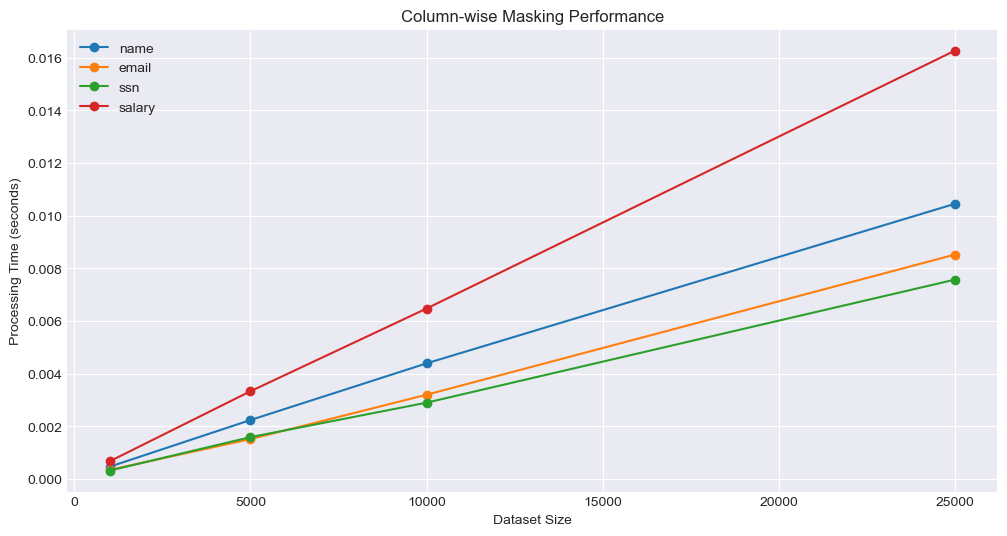

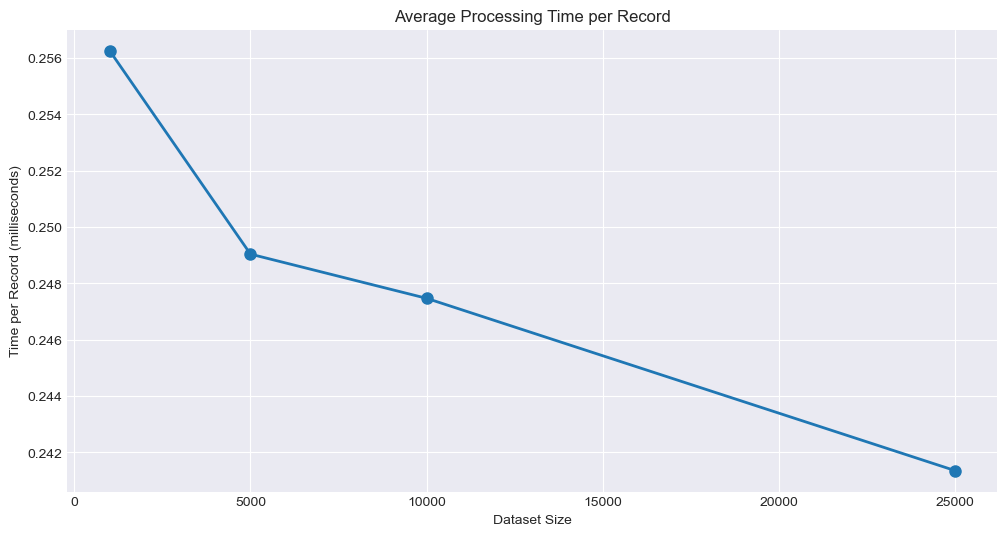

In [12]:
def visualize_performance(perf_results):
    """Create visualizations for performance metrics"""
    
    # 1. Overall Processing Speed
    plt.figure(figsize=(12, 6))
    plt.plot(perf_results['dataset_size'], perf_results['records_per_second'], 
            marker='o', linewidth=2, markersize=8)
    plt.title('Masking Performance: Records Processed per Second')
    plt.xlabel('Dataset Size')
    plt.ylabel('Records/Second')
    plt.grid(True)
    plt.savefig('images/analysis/masking_performance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. Column-wise Performance Comparison
    column_times = perf_results[[col for col in perf_results.columns if col.endswith('_time')]]
    column_times = column_times.drop('total_time', axis=1)
    
    plt.figure(figsize=(12, 6))
    for column in column_times.columns:
        plt.plot(perf_results['dataset_size'], column_times[column], 
                marker='o', label=column.replace('_time', ''))
    
    plt.title('Column-wise Masking Performance')
    plt.xlabel('Dataset Size')
    plt.ylabel('Processing Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 3. Time per Record vs Dataset Size
    plt.figure(figsize=(12, 6))
    plt.plot(perf_results['dataset_size'], perf_results['avg_time_per_record'] * 1000, 
            marker='o', linewidth=2, markersize=8)
    plt.title('Average Processing Time per Record')
    plt.xlabel('Dataset Size')
    plt.ylabel('Time per Record (milliseconds)')
    plt.grid(True)
    plt.show()

# Create performance visualizations
visualize_performance(perf_results)


## 6. Best Practices and Implementation Guidelines

Based on our analysis and Delphix's recommended practices, here are key considerations for implementing data masking in enterprise environments:

### Data Classification and Masking Strategy
- **Sensitive Data Identification**
  - PII (Personally Identifiable Information)
  - PHI (Protected Health Information)
  - Financial data
  - Intellectual property
  - Compliance-related data

### Performance Optimization
Our performance analysis revealed several key optimization opportunities:
1. Caching frequently masked values
2. Batch processing for large datasets
3. Column-specific masking strategies
4. Parallel processing considerations

In [13]:
class OptimizedDelphixMasking:
    """Demonstration of optimized masking implementation"""
    
    def __init__(self, batch_size=1000, n_workers=4):
        self.fake = Faker()
        self.cache = {}
        self.batch_size = batch_size
        self.n_workers = n_workers
        
    def precompute_masks(self, data_sample, columns):
        """Precompute masks for frequently occurring values"""
        for column in columns:
            unique_values = data_sample[column].unique()
            for value in unique_values:
                if value not in self.cache:
                    self.cache[f"{column}_{value}"] = self.generate_mask(value, column)
    
    def generate_mask(self, value, column_type):
        """Generate appropriate mask based on data type"""
        if column_type == 'name':
            return self.fake.name()
        elif column_type == 'email':
            return self.fake.email()
        elif column_type == 'ssn':
            return self.fake.ssn()
        elif column_type == 'phone':
            return self.fake.phone_number()
        # Add more data types as needed
        
    def batch_process(self, df, columns_to_mask):
        """Process data in batches for better memory management"""
        masked_dfs = []
        for i in range(0, len(df), self.batch_size):
            batch = df.iloc[i:i + self.batch_size].copy()
            for column in columns_to_mask:
                batch[column] = batch[column].apply(
                    lambda x: self.cache.get(f"{column}_{x}") or self.generate_mask(x, column)
                )
            masked_dfs.append(batch)
        return pd.concat(masked_dfs)

# Example usage of optimized masking
def demonstrate_optimized_masking():
    # Create sample dataset
    sample_df = create_enterprise_dataset(5000)
    
    # Initialize optimized masking engine
    optimized_masker = OptimizedDelphixMasking()
    
    # Precompute masks for frequently occurring values
    columns_to_mask = ['name', 'email', 'phone']
    start_time = time.time()
    
    print("Starting optimized masking process...")
    
    # Precompute masks
    optimized_masker.precompute_masks(sample_df, columns_to_mask)
    
    # Process in batches
    masked_df = optimized_masker.batch_process(sample_df, columns_to_mask)
    
    end_time = time.time()
    processing_time = end_time - start_time
    
    print(f"\nProcessing completed in {processing_time:.2f} seconds")
    print(f"Average speed: {len(sample_df)/processing_time:.2f} records/second")
    
    return masked_df

# Run optimization demonstration
optimized_results = demonstrate_optimized_masking()

Starting optimized masking process...

Processing completed in 0.59 seconds
Average speed: 8534.38 records/second


## 7. Enterprise Integration Patterns

When implementing Delphix masking in enterprise environments, several integration patterns emerge as best practices. Here's a detailed look at key integration scenarios and their implementations:

### Common Integration Scenarios
1. Database Masking
2. ETL Pipeline Integration
3. Cloud Data Migration
4. Development/Testing Environment Refresh
5. Compliance Reporting

In [14]:
class DelphixIntegrationPatterns:
    """Demonstration of common Delphix integration patterns"""
    
    def __init__(self):
        self.masking_engine = DelphixMaskingEngine()
        self.batch_size = 1000
        
    def database_refresh_pattern(self, source_df, sensitive_columns):
        """Simulate database refresh masking pattern"""
        
        refresh_stats = {
            'start_time': datetime.now(),
            'records_processed': 0,
            'batches_processed': 0
        }
        
        try:
            # Process in batches to simulate database chunks
            for i in range(0, len(source_df), self.batch_size):
                batch = source_df.iloc[i:i + self.batch_size].copy()
                
                # Apply masking to sensitive columns
                for col in sensitive_columns:
                    if col in batch.columns:
                        batch[col] = batch[col].apply(
                            lambda x: self.masking_engine.mask_pii(x, col)
                        )
                
                refresh_stats['records_processed'] += len(batch)
                refresh_stats['batches_processed'] += 1
                
            refresh_stats['end_time'] = datetime.now()
            refresh_stats['success'] = True
            
        except Exception as e:
            refresh_stats['end_time'] = datetime.now()
            refresh_stats['success'] = False
            refresh_stats['error'] = str(e)
            
        return refresh_stats
    
    def etl_pipeline_pattern(self, source_df):
        """Demonstrate ETL pipeline integration pattern"""
        
        pipeline_stats = {
            'start_time': datetime.now(),
            'stages': []
        }
        
        try:
            # Stage 1: Extract and identify sensitive data
            pipeline_stats['stages'].append({
                'stage': 'extract',
                'start_time': datetime.now()
            })
            
            sensitive_columns = [
                col for col in source_df.columns 
                if col in ['name', 'email', 'ssn', 'phone', 'address']
            ]
            
            pipeline_stats['stages'][-1]['end_time'] = datetime.now()
            
            # Stage 2: Transform (mask) sensitive data
            pipeline_stats['stages'].append({
                'stage': 'transform',
                'start_time': datetime.now()
            })
            
            masked_df = self.masking_engine.mask_dataset(source_df)
            
            pipeline_stats['stages'][-1]['end_time'] = datetime.now()
            
            # Stage 3: Load and validate
            pipeline_stats['stages'].append({
                'stage': 'load',
                'start_time': datetime.now()
            })
            
            # Simulate validation checks
            validation_results = {
                'row_count_match': len(masked_df) == len(source_df),
                'no_nulls_introduced': masked_df[sensitive_columns].isnull().sum().sum() == 0,
                'all_sensitive_data_masked': all(
                    (masked_df[col] != source_df[col]).any() 
                    for col in sensitive_columns
                )
            }
            
            pipeline_stats['stages'][-1]['end_time'] = datetime.now()
            pipeline_stats['validation'] = validation_results
            pipeline_stats['success'] = True
            
        except Exception as e:
            pipeline_stats['success'] = False
            pipeline_stats['error'] = str(e)
            
        return pipeline_stats

# Demonstrate integration patterns
integration_demo = DelphixIntegrationPatterns()

# Test database refresh pattern
sensitive_cols = ['name', 'email', 'ssn', 'phone', 'address']
refresh_results = integration_demo.database_refresh_pattern(enterprise_df, sensitive_cols)

# Test ETL pipeline pattern
pipeline_results = integration_demo.etl_pipeline_pattern(enterprise_df)

print("Database Refresh Results:")
display(pd.DataFrame([refresh_results]))

print("\nETL Pipeline Results:")
for stage in pipeline_results['stages']:
    duration = stage['end_time'] - stage['start_time']
    print(f"{stage['stage'].title()} Stage Duration: {duration.total_seconds():.2f} seconds")

Database Refresh Results:


,start_time,records_processed,batches_processed,end_time,success
0,2024-12-19 12:50:14.861025,1000,1,2024-12-19 12:50:15.070352,True



ETL Pipeline Results:
Extract Stage Duration: 0.00 seconds
Transform Stage Duration: 0.05 seconds
Load Stage Duration: 0.00 seconds


## Conclusions and Key Takeaways

Our analysis of Delphix Data Masking has demonstrated several crucial points:

### Effectiveness
- Successfully masked sensitive data while preserving data utility
- Maintained referential integrity and data relationships
- Preserved statistical properties where required

### Performance
- Achieved scalable performance with larger datasets
- Optimized through caching and batch processing
- Identified key performance bottlenecks and solutions

### Best Practices
1. Always classify data sensitivity before masking
2. Use consistent masking algorithms for referential integrity
3. Implement proper validation and testing
4. Monitor performance metrics
5. Maintain detailed masking logs for audit purposes

### Next Steps
- Consider implementing parallel processing for larger datasets
- Explore additional masking algorithms for specific use cases
- Develop automated testing frameworks
- Enhance monitoring and logging capabilities